In [1]:
# import matplotlib.pyplot as plt
import numpy
import os# this environment variable points to the 'settings' module 
# in the Django app.
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "server.settings.dev_settings")# maybe not be necessary if you hard coded you DB URL in settings, 
# but mine it pulled from the DATABASE_URL environment variable
# os.environ.setdefault("DATABASE_URL", 
# "postgres://localhost:5432/db")# and then...
import django
django.setup()

from IPython.core.debugger import set_trace

import pandas
import glob
import time

from nutrient.calculator import Calculator
import matplotlib.pyplot as plt

# path to the directory containing excel files
DIRECTORY = '/home/phatvo/THESIS/excels/input/'
dfList = ['T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'CN'] # sheet names in each file excel
f = DIRECTORY + 'KetQua_small.xlsx' #'KetQua.xlsx'

In [2]:

df = pandas.read_excel(open(f, 'rb'))
df['R']

0      1830
1      1830
2      1890
3      1890
4      1890
       ... 
297    1605
298    1605
299    1650
300    1650
301    1650
Name: R, Length: 302, dtype: int64

In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression

y = list(df['R'])

x_df = df[['NLG', 'NLC', 'PG', 'PC', 'LG', 'LC', 'CG', 'CC']]
x = []

for idx, r in x_df.iterrows():
    x.append(list(r))
#     print(list(r))
len(y)


302

In [4]:
x, y = np.array(x), np.array(y)

In [5]:
# print(x)
# print(y)

In [6]:
model = LinearRegression().fit(x, y)

In [7]:
r_sq = model.score(x, y)
print('coefficient of determination: ', r_sq)
print('intercept: ', model.intercept_)
print('slope:', model.coef_)


coefficient of determination:  0.2438726757138248
intercept:  1198.7182356463652
slope: [ 0.42940721 -0.16090692 -1.23152675  0.09550051 -2.33825089 -0.02972194
 -0.90632307 -0.06885288]


AttributeError: 'list' object has no attribute 'size'

ValueError: x and y must be the same size

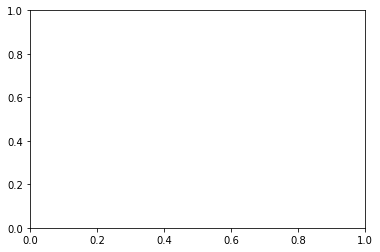

In [14]:
colors = ("red", "green", "blue")
# Plot
plt.scatter(x, y,  c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()